In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from skimage.io import imread, imshow
from skimage import img_as_float
from skimage.color import rgb2grey
from skimage.transform import resize
from skimage.segmentation import (random_walker, felzenszwalb, 
                                  slic, quickshift, clear_border,
                                  find_boundaries, mark_boundaries, 
                                  watershed, chan_vese, morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set, circle_level_set)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
e16_5 = 'data/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_001.tif'
orig_img = imread(e16_5)

In [5]:
orig_img = img_as_float(orig_img)

In [6]:
orig_img.shape

(2475, 2475, 3)

## Detail

In [7]:
w = 256
h = 256

img = resize(orig_img, (w, h, 3))

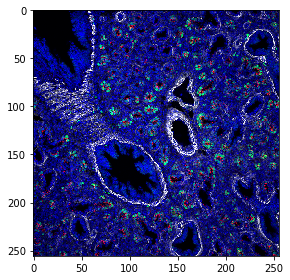

In [8]:
imshow(img)
pass

In [9]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

In [10]:
list(map(np.median, [red, green, blue]))

[0.03346274880802695, 0.038791753731524006, 0.4243588541068255]

In [11]:
t1 = (red < np.median(red)) 
t1 &= (green < np.median(green)) 
t1 &= (blue < np.median(blue))
t2 = red > np.percentile(red, 0.9)
t3 = green > np.percentile(green, 0.9)
t4 = blue > np.percentile(blue, 0.9)

### felzenszwalb

In [12]:
help(felzenszwalb)

Help on function felzenszwalb in module skimage.segmentation._felzenszwalb:

felzenszwalb(image, scale=1, sigma=0.8, min_size=20, multichannel=True)
    Computes Felsenszwalb's efficient graph based image segmentation.
    
    Produces an oversegmentation of a multichannel (i.e. RGB) image
    using a fast, minimum spanning tree based clustering on the image grid.
    The parameter ``scale`` sets an observation level. Higher scale means
    less and larger segments. ``sigma`` is the diameter of a Gaussian kernel,
    used for smoothing the image prior to segmentation.
    
    The number of produced segments as well as their size can only be
    controlled indirectly through ``scale``. Segment size within an image can
    vary greatly depending on local contrast.
    
    For RGB images, the algorithm uses the euclidean distance between pixels in
    color space.
    
    Parameters
    ----------
    image : (width, height, 3) or (width, height) ndarray
        Input image.
    scale

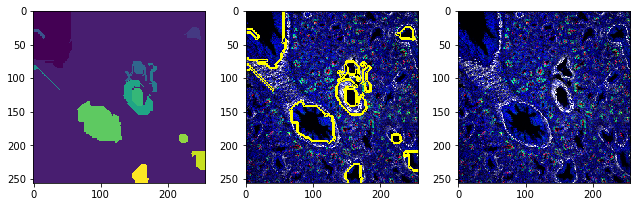

In [13]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
scale = 150
sigma=5
min_size=100
segments = felzenszwalb(img, scale, sigma, min_size)
plt.imshow(segments)
plt.subplot(1,3,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
plt.subplot(1,3,3)
imshow(img)
pass

### SLIC

In [14]:
help(slic)

Help on function slic in module skimage.segmentation.slic_superpixels:

slic(image, n_segments=100, compactness=10.0, max_iter=10, sigma=0, spacing=None, multichannel=True, convert2lab=None, enforce_connectivity=True, min_size_factor=0.5, max_size_factor=3, slic_zero=False)
    Segments image using k-means clustering in Color-(x,y,z) space.
    
    Parameters
    ----------
    image : 2D, 3D or 4D ndarray
        Input image, which can be 2D or 3D, and grayscale or multichannel
        (see `multichannel` parameter).
    n_segments : int, optional
        The (approximate) number of labels in the segmented output image.
    compactness : float, optional
        Balances color proximity and space proximity. Higher values give
        more weight to space proximity, making superpixel shapes more
        square/cubic. In SLICO mode, this is the initial compactness.
        This parameter depends strongly on image contrast and on the
        shapes of objects in the image. We recommend e

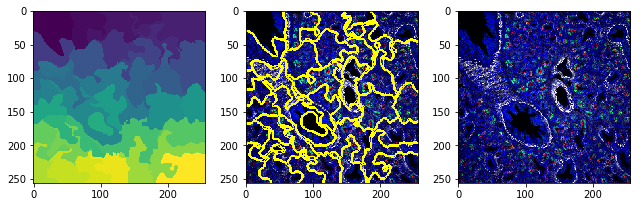

In [16]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
n_segments = 50
compactness = 5.0
sigma = 4
enforce_connectivity = True
segments = slic(img, 
                n_segments=n_segments, 
                compactness=compactness, 
                sigma=sigma, 
                enforce_connectivity=enforce_connectivity)
plt.imshow(segments)
plt.subplot(1,3,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
plt.subplot(1,3,3)
imshow(img)
pass

### Qucikshift

In [17]:
help(quickshift)

Help on function quickshift in module skimage.segmentation._quickshift:

quickshift(image, ratio=1.0, kernel_size=5, max_dist=10, return_tree=False, sigma=0, convert2lab=True, random_seed=42)
    Segments image using quickshift clustering in Color-(x,y) space.
    
    Produces an oversegmentation of the image using the quickshift mode-seeking
    algorithm.
    
    Parameters
    ----------
    image : (width, height, channels) ndarray
        Input image.
    ratio : float, optional, between 0 and 1
        Balances color-space proximity and image-space proximity.
        Higher values give more weight to color-space.
    kernel_size : float, optional
        Width of Gaussian kernel used in smoothing the
        sample density. Higher means fewer clusters.
    max_dist : float, optional
        Cut-off point for data distances.
        Higher means fewer clusters.
    return_tree : bool, optional
        Whether to return the full segmentation hierarchy tree and distances.
    sigm

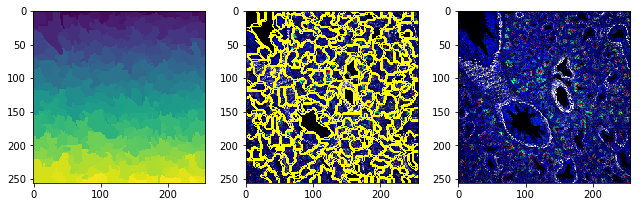

In [18]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
ratio = 1
max_dist = 100
kernel_size = 2
sigma = 3
segments = quickshift(img, 
                      ratio=ratio, 
                      max_dist=max_dist,
                      kernel_size=kernel_size,
                      sigma=sigma)
plt.imshow(segments)
plt.subplot(1,3,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
plt.subplot(1,3,3)
imshow(img)
pass

### Chan-vese

In [19]:
help(chan_vese)

Help on function chan_vese in module skimage.segmentation._chan_vese:

chan_vese(image, mu=0.25, lambda1=1.0, lambda2=1.0, tol=0.001, max_iter=500, dt=0.5, init_level_set='checkerboard', extended_output=False)
    Chan-Vese segmentation algorithm.
    
    Active contour model by evolving a level set. Can be used to
    segment objects without clearly defined boundaries.
    
    Parameters
    ----------
    image : (M, N) ndarray
        Grayscale image to be segmented.
    mu : float, optional
        'edge length' weight parameter. Higher `mu` values will
        produce a 'round' edge, while values closer to zero will
        detect smaller objects.
    lambda1 : float, optional
        'difference from average' weight parameter for the output
        region with value 'True'. If it is lower than `lambda2`, this
        region will have a larger range of values than the other.
    lambda2 : float, optional
        'difference from average' weight parameter for the output
        r

In [20]:
gimg = rgb2grey(img)

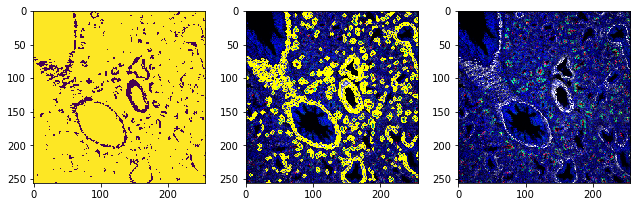

In [21]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
mu=0.05
segments = chan_vese(gimg, mu=mu)
plt.imshow(segments)
plt.subplot(1,3,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
plt.subplot(1,3,3)
imshow(img)
pass

### morphological chan vese

In [22]:
help(morphological_chan_vese)

Help on function morphological_chan_vese in module skimage.segmentation.morphsnakes:

morphological_chan_vese(image, iterations, init_level_set='checkerboard', smoothing=1, lambda1=1, lambda2=1, iter_callback=<function <lambda> at 0x10a783ea0>)
    Morphological Active Contours without Edges (MorphACWE)
    
    Active contours without edges implemented with morphological operators. It
    can be used to segment objects in images and volumes without well defined
    borders. It is required that the inside of the object looks different on
    average than the outside (i.e., the inner area of the object should be
    darker or lighter than the outer area on average).
    
    Parameters
    ----------
    image : (M, N) or (L, M, N) array
        Grayscale image or volume to be segmented.
    iterations : uint
        Number of iterations to run
    init_level_set : str, (M, N) array, or (L, M, N) array
        Initial level set. If an array is given, it will be binarized and used
      

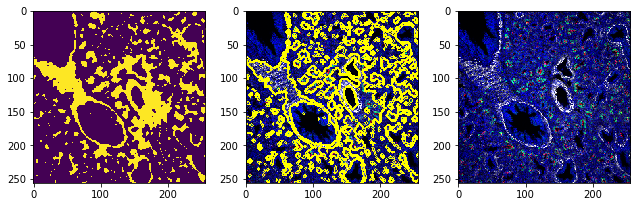

In [23]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
smoothing=1
lambda1=1.0
lambda2=1.1
iterations=100
segments = morphological_chan_vese(gimg, iterations, smoothing=smoothing, 
                                   lambda1=lambda1, lambda2=lambda2)
plt.imshow(segments)
plt.subplot(1,3,2)
bnd = find_boundaries(segments)
img2 = mark_boundaries(img, bnd, mode='thick')
imshow(img2)
plt.subplot(1,3,3)
imshow(img)
pass